## DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP (MAY2023)

## Task 1 : Prediction using Supervised Machine Learning

## GRIP @ The Sparks Foundation

## Author - ATHARVA SUNIL BELE

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("covid19.csv")
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 49 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56111 entries, 0 to 56110
Data columns (total 49 columns):
iso_code                              55794 non-null object
continent                             55477 non-null object
location                              56111 non-null object
date                                  56111 non-null object
total_cases                           52472 non-null float64
new_cases                             55177 non-null float64
new_cases_smoothed                    54376 non-null float64
total_deaths                          43208 non-null float64
new_deaths                            55177 non-null float64
new_deaths_smoothed                   54376 non-null float64
total_cases_per_million               52191 non-null float64
new_cases_per_million                 55113 non-null float64
new_cases_smoothed_per_million        54311 non-null float64
total_deaths_per_million              42942 non-null float64
new_deaths_per_million                551

In [50]:
df.describe()

total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  5.247200e+04   55177.000000        54376.000000  4.320800e+04   
mean   1.596171e+05    1868.587274         1835.575052  6.679707e+03   
std    1.606249e+06   17287.292537        16804.332434  5.424512e+04   
min    1.000000e+00   -8261.000000         -552.000000  1.000000e+00   
25%    1.710000e+02       0.000000            0.857000  1.200000e+01   
50%    2.001000e+03      13.000000           18.857000  8.200000e+01   
75%    2.085400e+04     226.000000          235.143000  7.010000e+02   
max    5.155288e+07  590121.000000       557963.714000  1.274311e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  55177.000000         54376.000000             52191.000000   
mean      46.186599            45.973885              2969.340164   
std      383.258051           370.784378              5841.280406   
min    -1918.000000          -232.143000                 0.001000   
25%        0.000000             0.000000                86.753500   
50%        0.000000             0.286000               567.268000   
75%        4.000000             3.857000              3302.047500   
max    10491.000000          8121.143000             70885.912000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           55113.000000                    54311.000000   
mean               37.168366                       36.130155   
std               129.549266                       95.967113   
min             -2212.545000                     -269.978000   
25%                 0.000000                        0.246000   
50%                 2.121000                        3.768000   
75%                25.042000                       28.299000   
max              8652.658000                     2472.188000   

       total_deaths_per_million  ...  gdp_per_capita  extreme_poverty  \
count              42942.000000  ...    49258.000000     32830.000000   
mean                  92.726001  ...    20659.323524        12.400807   
std                  177.658562  ...    20326.646094        19.407501   
min                    0.000000  ...      661.240000         0.100000   
25%                    3.831000  ...     5321.444000         0.500000   
50%                   19.891500  ...    14048.881000         2.000000   
75%                   84.751500  ...    31400.840000        18.100000   
max                 1237.551000  ...   116935.600000        77.600000   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count           49886.000000         51712.000000    38824.000000   
mean              252.458534             8.065856       10.751542   
std               117.463379             4.180359       10.471989   
min                79.370000             0.990000        0.100000   
25%               156.139000             5.310000        1.900000   
50%               238.339000             7.110000        6.400000   
75%               318.991000            10.390000       19.600000   
max               724.417000            30.530000       44.000000   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
count  38323.000000            23606.000000                44941.000000   
mean      32.640662               52.133554                    3.091807   
std       13.450695               31.642174                    2.514643   
min        7.700000                1.188000                    0.100000   
25%       21.400000               21.222000                    1.300000   
50%       31.400000               52.232000                    2.500000   
75%       40.900000               83.741000                    4.200000   
max       78.100000               98.999000                   13.800000   

       life_expectancy  human_development_index  
count     55077.000000             48162.000000  
mean         73.949188                 0.722562  
std           7.395660                 0.153237  
min 

In [51]:
df.shape  #shape of dataset

(56111, 49)

In [52]:
df.isnull().sum()

iso_code                                317
continent                               634
location                                  0
date                                      0
total_cases                            3639
new_cases                               934
new_cases_smoothed                     1735
total_deaths                          12903
new_deaths                              934
new_deaths_smoothed                    1735
total_cases_per_million                3920
new_cases_per_million                   998
new_cases_smoothed_per_million         1800
total_deaths_per_million              13169
new_deaths_per_million                  998
new_deaths_smoothed_per_million        1800
icu_patients                          52010
icu_patients_per_million              52010
hosp_patients                         51310
hosp_patients_per_million             51310
weekly_icu_admissions                 55747
weekly_icu_admissions_per_million     55747
weekly_hosp_admissions          

In [53]:
df1=df[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
df1.head()

date  total_cases  new_cases  total_deaths  new_tests  total_tests
0  2019-12-31          NaN        0.0           NaN        NaN          NaN
1  2020-01-01          NaN        0.0           NaN        NaN          NaN
2  2020-01-02          NaN        0.0           NaN        NaN          NaN
3  2020-01-03          NaN        0.0           NaN        NaN          NaN
4  2020-01-04          NaN        0.0           NaN        NaN          NaN

In [54]:
df1.mean()

total_cases     1.596171e+05
new_cases       1.868587e+03
total_deaths    6.679707e+03
new_tests       2.789188e+04
total_tests     2.194234e+06
dtype: float64

In [55]:
df1.cov()

total_cases     new_cases  total_deaths     new_tests  \
total_cases   2.580035e+12  2.752181e+10  9.349081e+10  6.764587e+10   
new_cases     2.752181e+10  2.988505e+08  1.027980e+09  7.426889e+08   
total_deaths  9.349081e+10  1.027980e+09  2.942533e+09  1.846588e+09   
new_tests     6.764587e+10  7.426889e+08  1.846588e+09  1.271818e+10   
total_tests   6.134965e+12  5.628498e+10  1.656179e+11  1.058407e+12   

               total_tests  
total_cases   6.134965e+12  
new_cases     5.628498e+10  
total_deaths  1.656179e+11  
new_tests     1.058407e+12  
total_tests   9.927738e+13

In [56]:
df1.corr()

total_cases  new_cases  total_deaths  new_tests  total_tests
total_cases      1.000000   0.962225      0.974704   0.918931     0.941086
new_cases        0.962225   1.000000      0.966026   0.901579     0.779509
total_deaths     0.974704   0.966026      1.000000   0.836752     0.844894
new_tests        0.918931   0.901579      0.836752   1.000000     0.918199
total_tests      0.941086   0.779509      0.844894   0.918199     1.000000

In [57]:
df1.var()

total_cases     2.580035e+12
new_cases       2.988505e+08
total_deaths    2.942533e+09
new_tests       1.271818e+10
total_tests     9.927738e+13
dtype: float64

In [58]:
df1.std()

total_cases     1.606249e+06
new_cases       1.728729e+04
total_deaths    5.424512e+04
new_tests       1.127749e+05
total_tests     9.963804e+06
dtype: float64

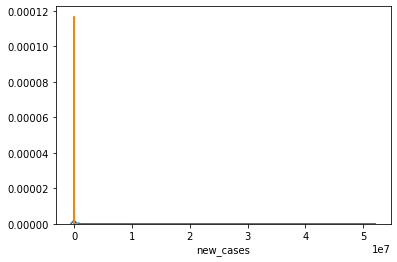

In [59]:
sns.distplot(df1['total_cases'])
sns.distplot(df1['new_cases']);

Text(0.5, 0, 'Month')

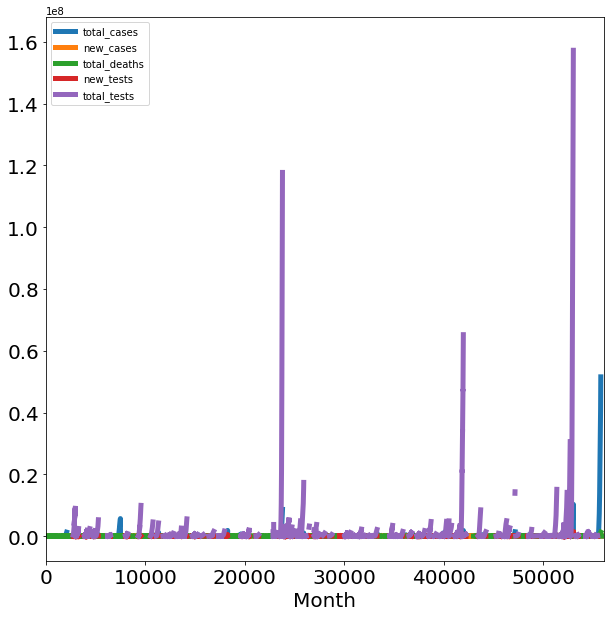

In [60]:
df1.plot(figsize = (10 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

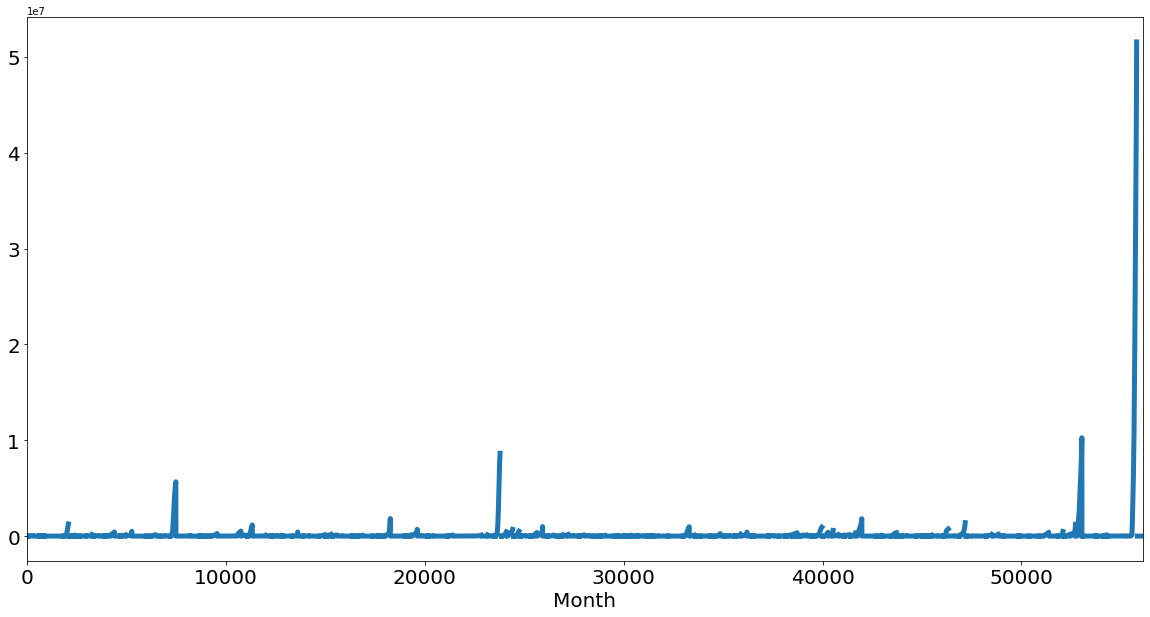

In [61]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

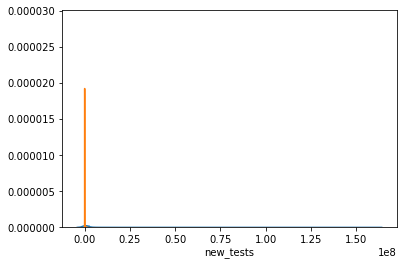

In [62]:
sns.distplot(df1['total_tests'])
sns.distplot(df1['new_tests']);

Text(0.5, 0, 'Month')

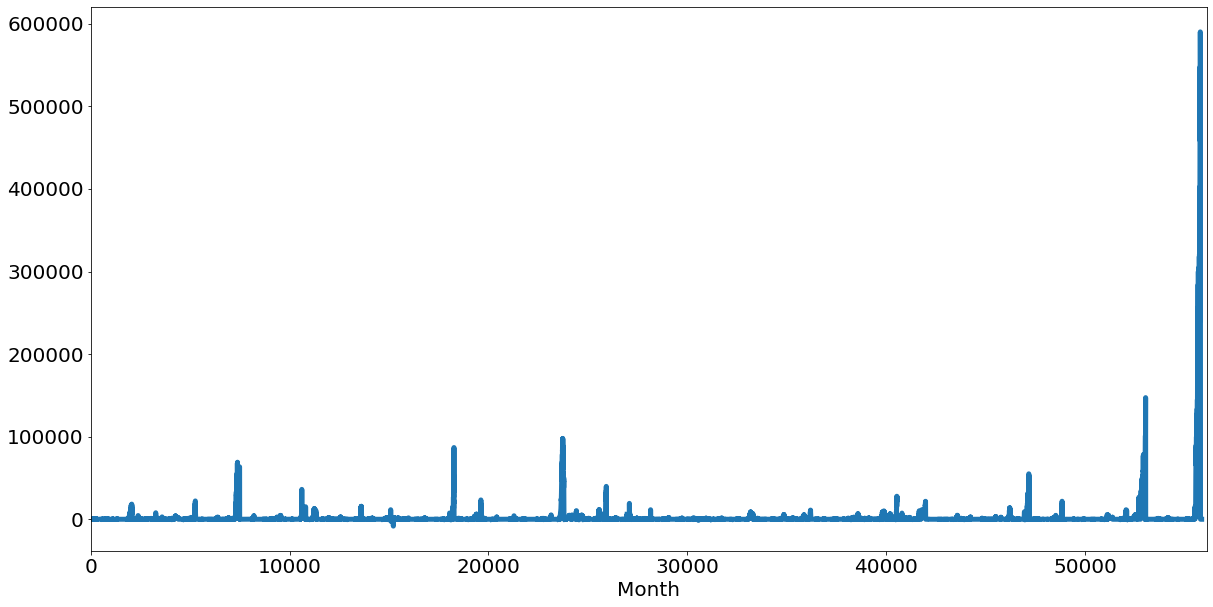

In [63]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

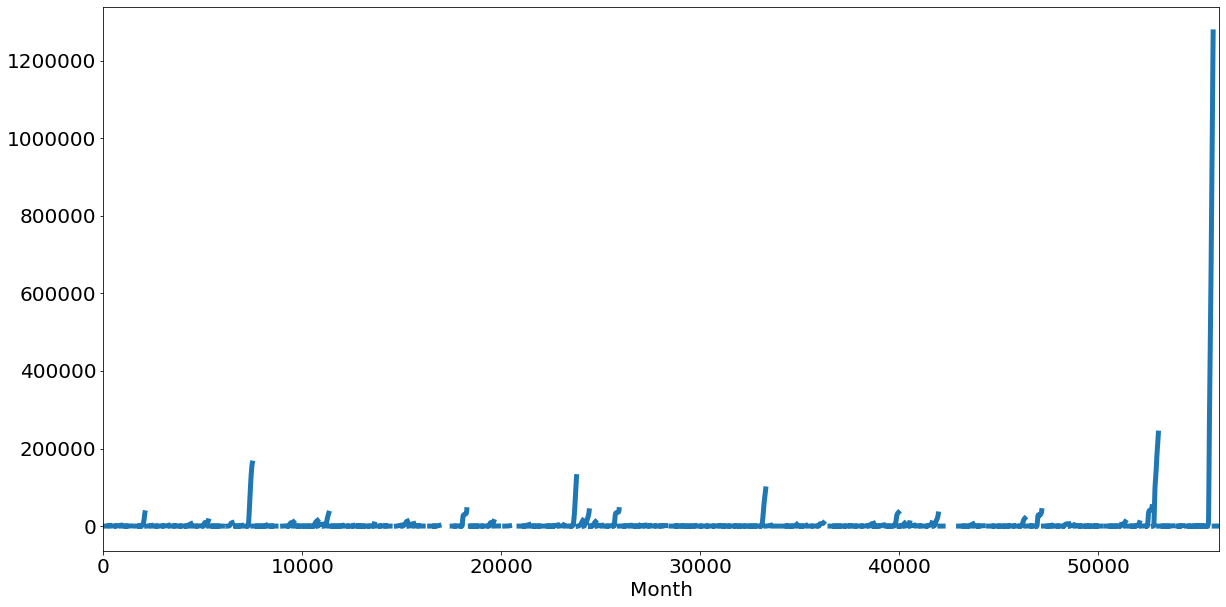

In [64]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

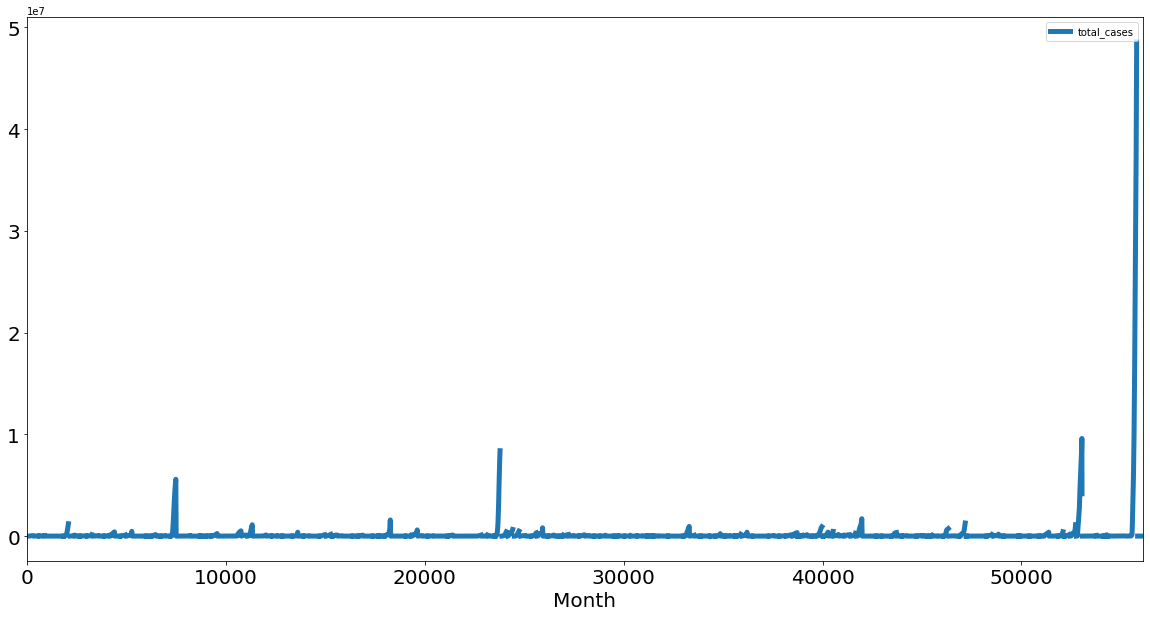

In [65]:
#Trends and Seasonality in TimeSeries Dataset

total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

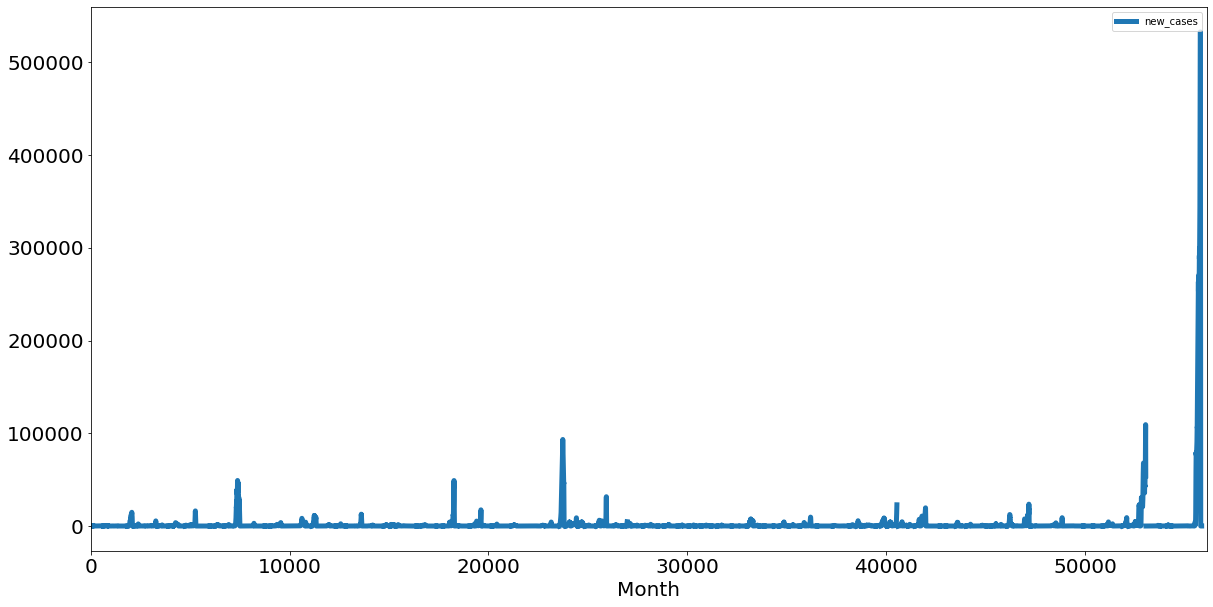

In [66]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

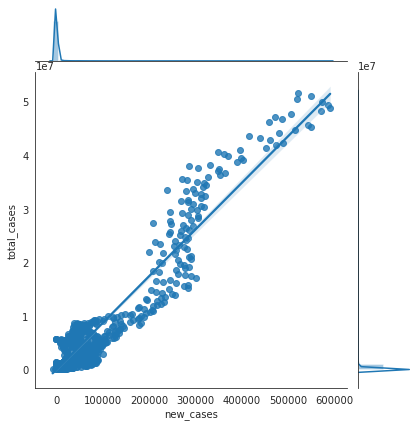

In [67]:
with sns.axes_style('white'):
    sns.jointplot("new_cases", "total_cases", data=df1, kind='reg')

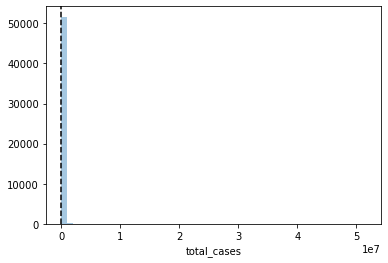

In [68]:
sns.distplot(df1['total_cases'], kde=False);
plt.axvline(0, color="k", linestyle="--");

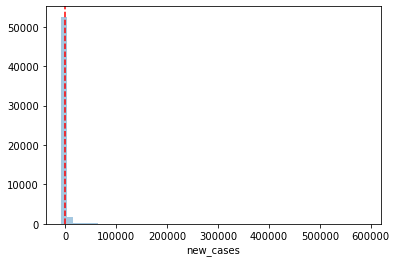

In [69]:
sns.distplot(df1['new_cases'], kde=False);
plt.axvline(0, color="r", linestyle="--");

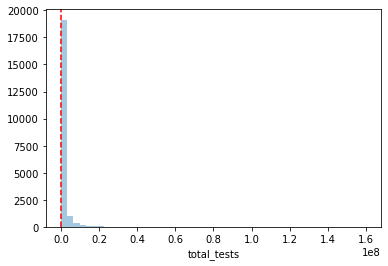

In [70]:
sns.distplot(df1['total_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

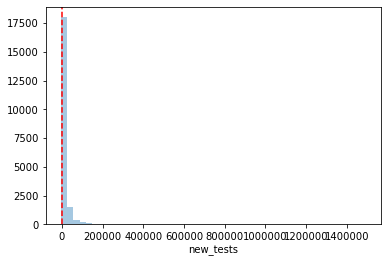

In [71]:
sns.distplot(df1['new_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

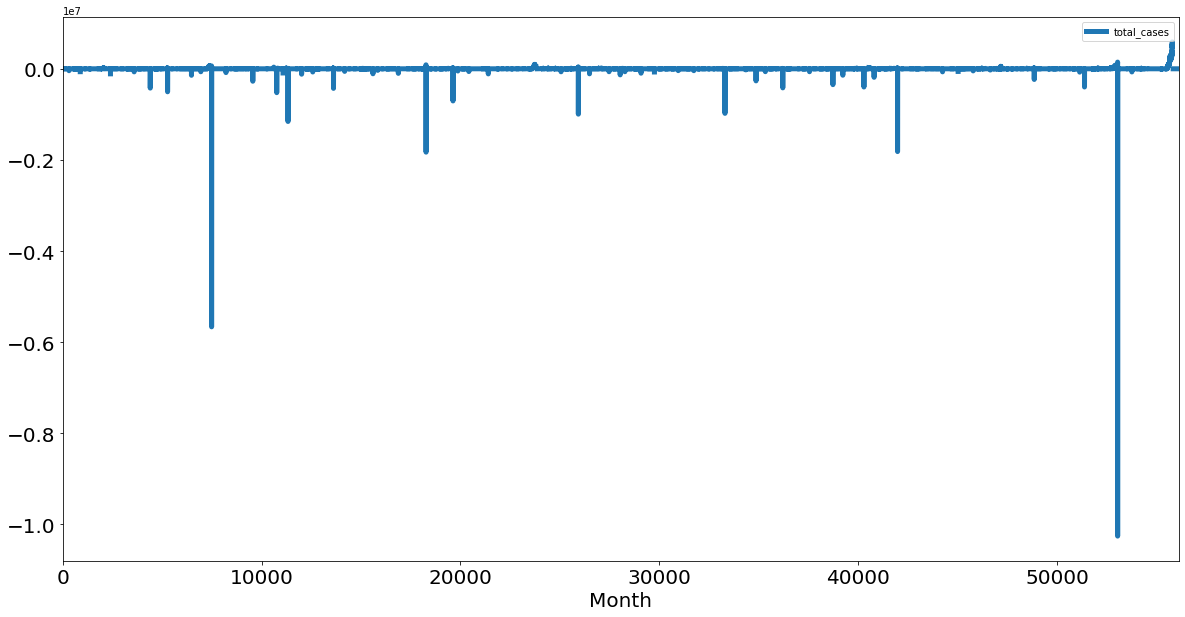

In [72]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);

Text(0.5, 0, 'Month')

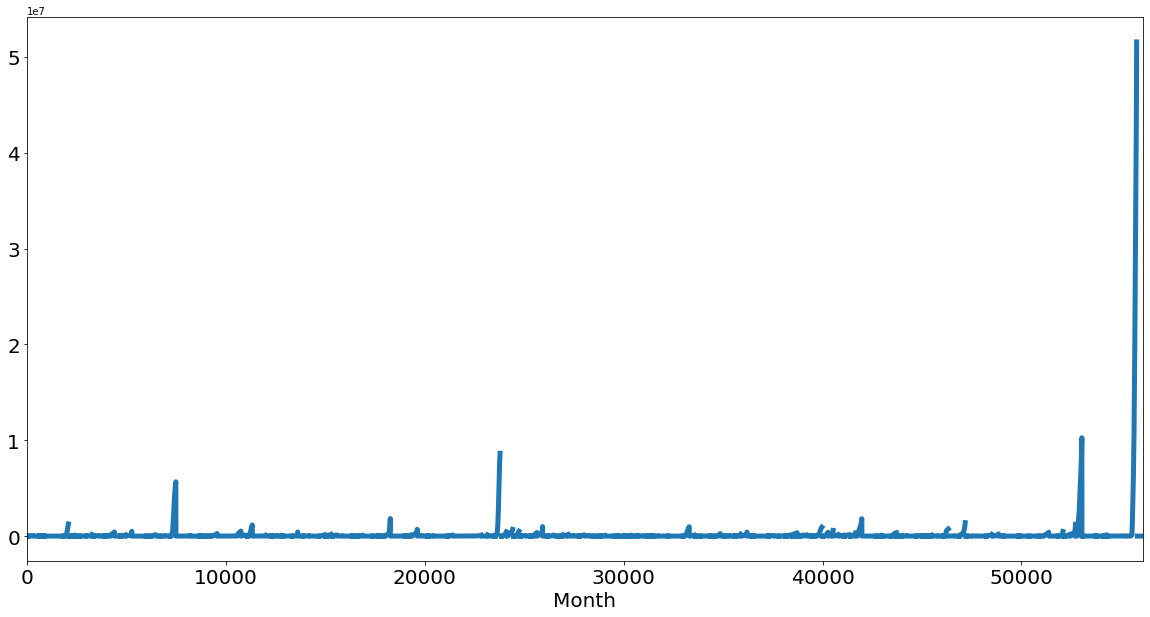

In [73]:
df1.total_cases.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)

Text(0.5, 0, 'Month')

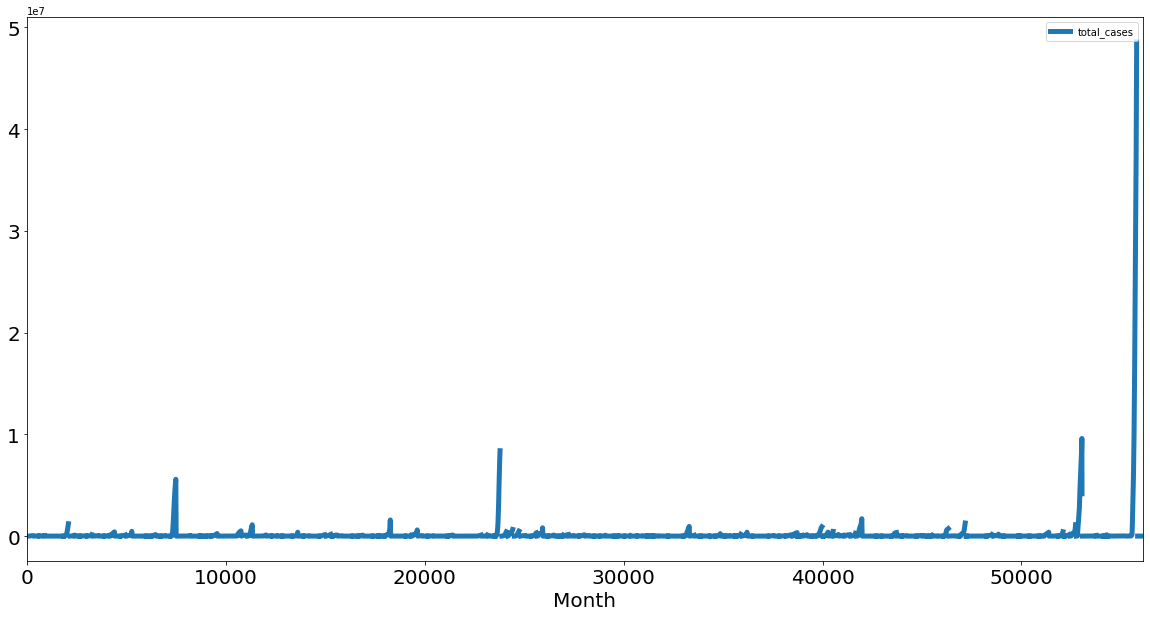

In [74]:
total_cases=df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)

In [75]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_r

In [76]:
ind = df[df['location']=='India']
ind

iso_code continent location        date  total_cases  new_cases  \
23471      IND      Asia    India  2019-12-31          NaN        0.0   
23472      IND      Asia    India  2020-01-01          NaN        0.0   
23473      IND      Asia    India  2020-01-02          NaN        0.0   
23474      IND      Asia    India  2020-01-03          NaN        0.0   
23475      IND      Asia    India  2020-01-04          NaN        0.0   
...        ...       ...      ...         ...          ...        ...   
23783      IND      Asia    India  2020-11-07    8462080.0    50356.0   
23784      IND      Asia    India  2020-11-08    8507754.0    45674.0   
23785      IND      Asia    India  2020-11-09    8553657.0    45903.0   
23786      IND      Asia    India  2020-11-10    8591730.0    38073.0   
23787      IND      Asia    India  2020-11-11    8636011.0    44281.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
23471                 NaN           NaN         0.0                  NaN  ...   
23472                 NaN           NaN         0.0                  NaN  ...   
23473                 NaN           NaN         0.0                  NaN  ...   
23474                 NaN           NaN         0.0                  NaN  ...   
23475                 NaN           NaN         0.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
23783           46423.000      125562.0       577.0              560.143  ...   
23784           46238.857      126121.0       559.0              572.857  ...   
23785           46334.857      126611.0       490.0              572.000  ...   
23786           46301.000      127059.0       448.0              566.000  ...   
23787           46019.286      127571.0       512.0              565.714  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
23471        6426.674             21.2                 282.28   
23472        6426.674             21.2                 282.28   
23473        6426.674             21.2                 282.28   
23474        6426.674             21.2                 282.28   
23475        6426.674             21.2                 282.28   
...               ...              ...                    ...   
23783        6426.674             21.2                 282.28   
23784        6426.674             21.2                 282.28   
23785        6426.674             21.2                 282.28   
23786        6426.674             21.2                 282.28   
23787        6426.674             21.2                 282.28   

       diabetes_prevalence  female_smokers  male_smokers  \
23471                10.39             1.9          20.6   
23472                10.39             1.9          20.6   
23473                10.39             1.9          20.6   
23474                10.39             1.9          20.6   
23475                10.39             1.9          20.6   
...                    ...             ...           ...   
23783                10.39             1.9          20.6   
23784                10.39             1.9          20.6   
23785                10.39             1.9          20.6   
23786                10.39             1.9          20.6   
23787                10.39             1.9          20.6   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
23471                   59.55                        0.53            69.66   
23472                   59.55                        0.53            69.66   
23473                   59.55                        0.53            69.66   
23474                   59.55                        0.53            69.66   
23475                   59.55                        0.53            69.66   
...                       ...                         ...              ...   
23783                   59.55                        0.53            69.66   
23784                   59.55 

In [77]:
pd.DataFrame(ind.isnull().sum(), columns= ['Number of missing values'])

Number of missing values
iso_code                                                   0
continent                                                  0
location                                                   0
date                                                       0
total_cases                                               31
new_cases                                                  1
new_cases_smoothed                                         6
total_deaths                                              73
new_deaths                                                 1
new_deaths_smoothed                                        6
total_cases_per_million                                   31
new_cases_per_million                                      1
new_cases_smoothed_per_million                             6
total_deaths_per_million                                  73
new_deaths_per_million                                     1
new_deaths_smoothed_per_million                            6
icu_patients                                             317
icu_patients_per_million                                 317
hosp_patients                                            317
hosp_patients_per_million                                317
weekly_icu_admissions                                    317
weekly_icu_admissions_per_million                        317
weekly_hosp_admissions                                   317
weekly_hosp_admissions_per_million                       317
total_tests                                               88
new_tests                                                 94
total_tests_per_thousand                                  88
new_tests_per_thousand                                    94
new_tests_smoothed                                        83
new_tests_smoothed_per_thousand                           83
tests_per_case                                            83
positive_rate                                             83
tests_units                                               76
stringency_index                                           2
population                                                 0
population_density                                         0
median_age                                                 0
aged_65_older                                              0
aged_70_older                                              0
gdp_per_capita                                             0
extreme_poverty                                            0
cardiovasc_death_rate                                      0
diabetes_prevalence                                        0
female_smokers                                             0
male_smokers                                               0
handwashing_facilities                                     0
hospital_beds_per_thousand                                 0
life_expectancy                                            0
human_development_index                                    0

In [78]:
ind['date'] = pd.to_datetime(ind['date'])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
ind = ind.drop(['icu_patients','icu_patients_per_million', 'hosp_patients','hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions','weekly_hosp_admissions_per_million','tests_units','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index'], axis=1)

In [80]:
ind.corr()

total_cases  new_cases  new_cases_smoothed  \
total_cases                         1.000000   0.773402            0.804692   
new_cases                           0.773402   1.000000            0.994069   
new_cases_smoothed                  0.804692   0.994069            1.000000   
total_deaths                        0.994849   0.798018            0.829079   
new_deaths                          0.668550   0.946814            0.936760   
new_deaths_smoothed                 0.725567   0.975862            0.975231   
total_cases_per_million             1.000000   0.773402            0.804692   
new_cases_per_million               0.773403   1.000000            0.994069   
new_cases_smoothed_per_million      0.804692   0.994069            1.000000   
total_deaths_per_million            0.994849   0.798018            0.829080   
new_deaths_per_million              0.668626   0.946841            0.936797   
new_deaths_smoothed_per_million     0.725562   0.975856            0.975227   
total_tests                         0.996947   0.706607            0.742347   
new_tests                           0.921000   0.901131            0.916720   
total_tests_per_thousand            0.996947   0.706607            0.742347   
new_tests_per_thousand              0.920991   0.901155            0.916724   
new_tests_smoothed                  0.947591   0.911927            0.933107   
new_tests_smoothed_per_thousand     0.947591   0.911921            0.933102   
tests_per_case                     -0.145799  -0.526696           -0.503360   
positive_rate                       0.047377   0.522503            0.487772   
stringency_index                    0.082459   0.354881            0.331669   

                                 total_deaths  new_deaths  \
total_cases                          0.994849    0.668550   
new_cases                            0.798018    0.946814   
new_cases_smoothed                   0.829079    0.936760   
total_deaths                         1.000000    0.687922   
new_deaths                           0.687922    1.000000   
new_deaths_smoothed                  0.753494    0.967721   
total_cases_per_million              0.994849    0.668550   
new_cases_per_million                0.798019    0.946813   
new_cases_smoothed_per_million       0.829080    0.936760   
total_deaths_per_million             1.000000    0.687922   
new_deaths_per_million               0.688004    1.000000   
new_deaths_smoothed_per_million      0.753486    0.967706   
total_tests                          0.987684    0.584268   
new_tests                            0.944257    0.796101   
total_tests_per_thousand             0.987684    0.584268   
new_tests_per_thousand               0.944259    0.796096   
new_tests_smoothed                   0.968650    0.808126   
new_tests_smoothed_per_thousand      0.968656    0.808127   
tests_per_case                      -0.223641   -0.624999   
positive_rate                        0.140164    0.635828   
stringency_index                    -0.499481    0.407430   

                                 new_deaths_smoothed  total_cases_per_million  \
total_cases                                 0.725567                 1.000000   
new_cases                                   0.975862                 0.773402   
new_cases_smoothed                          0.975231                 0.804692   
total_deaths                                0.753494                 0.994849   
new_deaths                                  0.967721                 0.668550   
new_deaths_smoothed                         1.000000                 0.725567   
total_cases_per_million                     0.725567                 1.000000   
new_cases_per_million                       0.975861                 0.773403   
new_cases_smoothed_per_million              0.975231                 0.804692   
total_deaths_per_million                    0.753494                 0.994849   
new_deaths_per_million                      0.967736        

Text(0.5, 6.79999999999999, 'NEW CASES SMOOTHED')

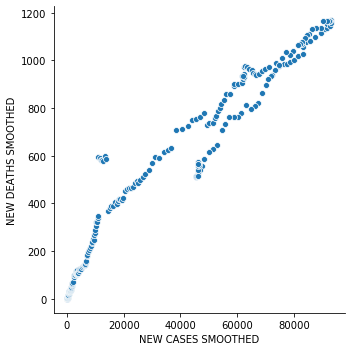

In [81]:
sns.relplot(x='new_cases_smoothed', y='new_deaths_smoothed', data=ind)
plt.ylabel('NEW DEATHS SMOOTHED',fontsize=10)
plt.xlabel('NEW CASES SMOOTHED',fontsize=10)

Text(-2.700000000000003, 0.5, 'NEW DEATHS')

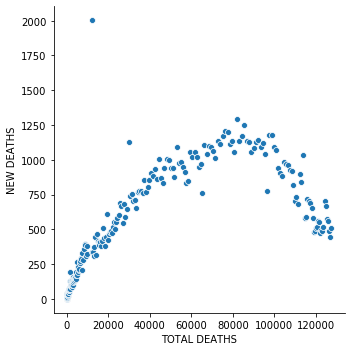

In [82]:
sns.relplot(x='total_deaths',y='new_deaths',data=ind)
plt.xlabel('TOTAL DEATHS',fontsize=10)
plt.ylabel('NEW DEATHS',fontsize=10)

Text(6.799999999999997, 0.5, 'NEW TESTS SMOOTHED PER THOUSAND')

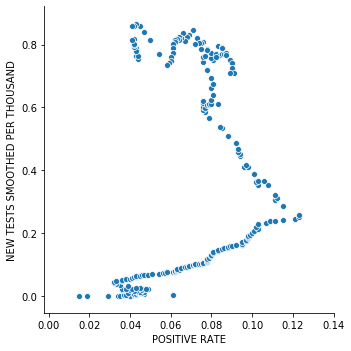

In [83]:
sns.relplot(x='positive_rate',y='new_tests_smoothed_per_thousand',data=ind)
plt.xlabel('POSITIVE RATE',fontsize=10)
plt.ylabel('NEW TESTS SMOOTHED PER THOUSAND',fontsize=10)

Text(-2.700000000000003, 0.5, 'NEW DEATHS')

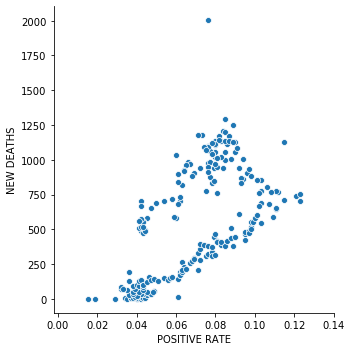

In [84]:
sns.relplot(x='positive_rate',y='new_deaths',data=ind)
plt.xlabel('POSITIVE RATE',fontsize=10)
plt.ylabel('NEW DEATHS',fontsize=10)

Text(0.5, 6.79999999999999, 'TOTAL CASES')

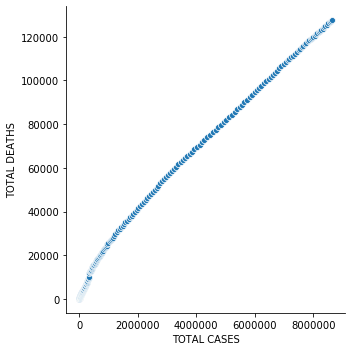

In [85]:
sns.relplot(x='total_cases',y='total_deaths',data=ind)
plt.ylabel('TOTAL DEATHS',fontsize=10)
plt.xlabel('TOTAL CASES',fontsize=10)

In [87]:

new_data=['iso_code', 'continent', 'location', 'date', 'total_cases','total_deaths','new_deaths_smoothed','population', 
              'population_density', 'median_age', 'aged_65_older','aged_70_older', 'gdp_per_capita', 'extreme_poverty',
              'cardiovasc_death_rate','diabetes_prevalence', 'female_smokers','male_smokers', 'handwashing_facilities',
              'hospital_beds_per_thousand','life_expectancy', 'human_development_index']

In [88]:
new_df=df[new_data]

In [89]:

new_df['date'] = pd.to_datetime(new_df['date'])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
new_df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [91]:
Asia = new_df[new_df['continent']=='Asia']
Asia.location.unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
       'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan',
       'Tajikistan', 'Thailand', 'Timor', 'Turkey',
       'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
      dtype=object)

In [92]:
Asia.head()

iso_code continent     location       date  total_cases  total_deaths  \
0      AFG      Asia  Afghanistan 2019-12-31          NaN           NaN   
1      AFG      Asia  Afghanistan 2020-01-01          NaN           NaN   
2      AFG      Asia  Afghanistan 2020-01-02          NaN           NaN   
3      AFG      Asia  Afghanistan 2020-01-03          NaN           NaN   
4      AFG      Asia  Afghanistan 2020-01-04          NaN           NaN   

   new_deaths_smoothed  population  population_density  median_age  ...  \
0                  NaN  38928341.0              54.422        18.6  ...   
1                  NaN  38928341.0              54.422        18.6  ...   
2                  NaN  38928341.0              54.422        18.6  ...   
3                  NaN  38928341.0              54.422        18.6  ...   
4                  NaN  38928341.0              54.422        18.6  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 22 columns]

In [93]:
dates=[]
dates = list(Asia.date)

In [95]:
total_deaths1 = []
Nepal = Asia[Asia['location']=='Nepal']
Nepal = Nepal.dropna()
pop = Nepal.population.unique()
for total_deaths in Nepal.total_cases:
  total = total_deaths/pop[0]
  total_deaths1.append(total)
    
total_deaths2 = []
India = Asia[Asia['location']=='India']
India = India.dropna()
pop = India.population.unique()
for total_deaths in India.total_cases:
  total = total_deaths/pop[0]
  total_deaths2.append(total)
    
total_deaths3 = []
Pakistan = Asia[Asia['location']=='Pakistan']
Pakistan = Pakistan.dropna()
pop = Pakistan.population.unique()
for total_deaths in Pakistan.total_cases:
  total = total_deaths/pop[0]
  total_deaths3.append(total)
    
total_deaths4 = []
Thailand = Asia[Asia['location']=='Thailand']
Thaland = Thailand.dropna()
pop = Thailand.population.unique()

for total_deaths in Nepal.total_cases:
  total = total_deaths/pop[0]
  total_deaths4.append(total)

In [97]:
dataframe = list(zip(dates,total_deaths1,total_deaths2,total_deaths3,total_deaths4))

In [98]:
df_Asia = pd.DataFrame(dataframe, columns = ['Date','Nepal','India','Pakistan','Thailand'])

In [99]:
df_Asia.head()

Date     Nepal         India  Pakistan  Thailand
0 2019-12-31  0.000010  5.434765e-08  0.000002  0.000004
1 2020-01-01  0.000010  6.014474e-08  0.000002  0.000004
2 2020-01-02  0.000013  6.521718e-08  0.000003  0.000005
3 2020-01-03  0.000014  6.739109e-08  0.000004  0.000006
4 2020-01-04  0.000015  9.057942e-08  0.000004  0.000006

In [100]:
df_Asia = df_Asia.set_index('Date')

Text(0, 0.5, 'TOTAL DEATH PER POPULATION')

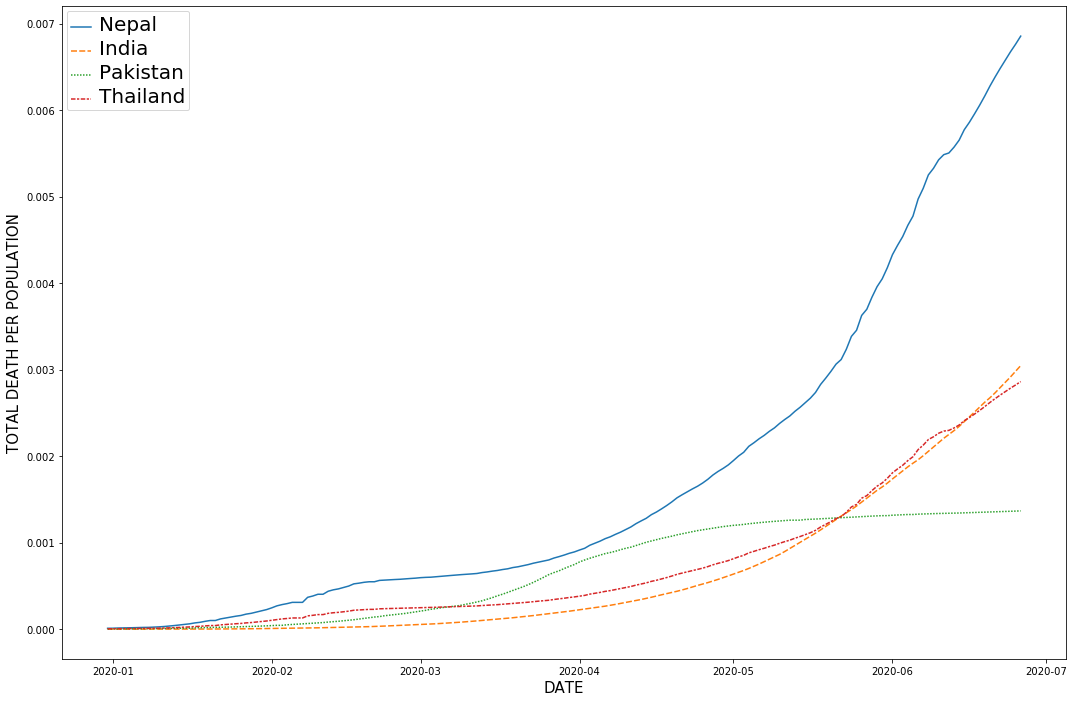

In [101]:
dims = (18,12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.lineplot(ax=ax, data=df_Asia)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='16')
plt.xlabel('DATE',fontsize=15)
plt.ylabel('TOTAL DEATH PER POPULATION',fontsize=15)

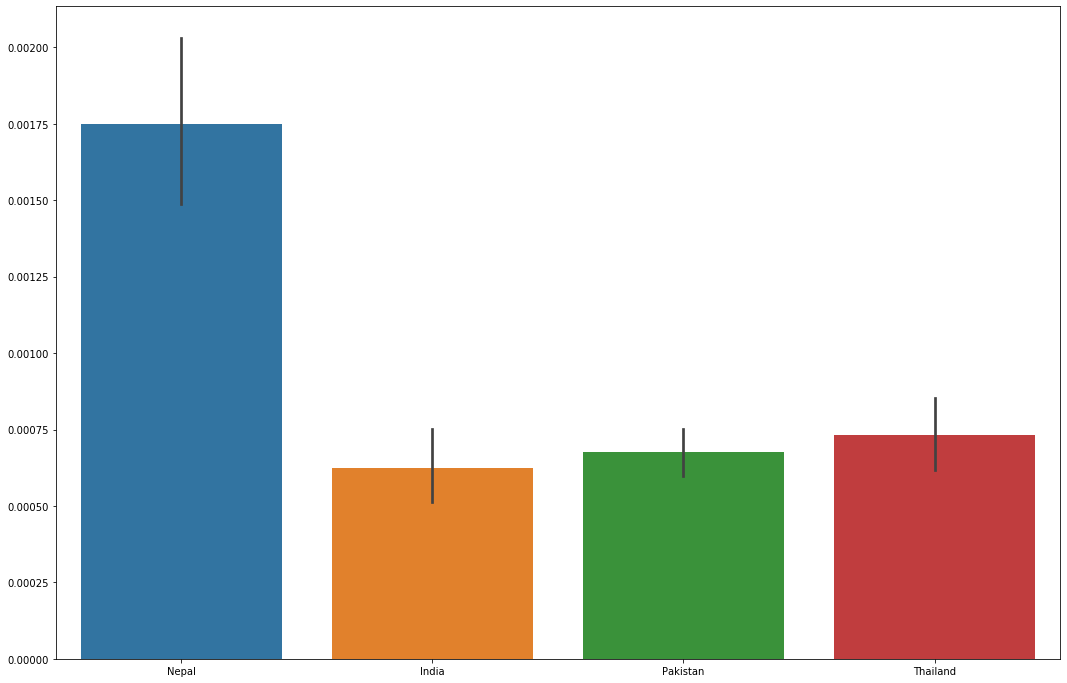

In [102]:
dims = (18,12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(ax=ax, data=df_Asia)

In [104]:
dates_new=[]
dates_new = list(Asia.date)

new_deaths1 = []
Nepal_new = Asia[Asia['location']=='Nepal']
Nepal = Nepal_new.dropna()
for new_deaths in Nepal.new_deaths_smoothed:
  new_deaths1.append(new_deaths)

new_deaths2 = []
India = Asia[Asia['location']=='India']
India = India.dropna()
for new_deaths in India.new_deaths_smoothed:
  new_deaths2.append(new_deaths)

new_deaths3 = []
Pakistan = Asia[Asia['location']=='Pakistan']
Pakistan = Pakistan.dropna()
for new_deaths in Pakistan.new_deaths_smoothed:
  new_deaths3.append(new_deaths)

new_deaths4 = []
Thailand = Asia[Asia['location']=='Thailand']
Thaland = Thailand.dropna()

for new_deaths in Nepal.new_deaths_smoothed:
  new_deaths4.append(new_deaths)


In [105]:
dataframe_new = list(zip(dates_new,new_deaths1,new_deaths2,new_deaths3,new_deaths4))


In [106]:

df_Asia_new = pd.DataFrame(dataframe_new, columns = ['Date','Nepal','India','Pakistan','Thailand'
                                                    ])
df_Asia_new.head()

Date  Nepal  India  Pakistan  Thailand
0 2019-12-31  0.143  0.143     0.286     0.143
1 2020-01-01  0.286  0.286     0.429     0.286
2 2020-01-02  0.286  0.286     0.429     0.286
3 2020-01-03  0.286  0.286     0.714     0.286
4 2020-01-04  0.286  0.429     0.857     0.286

In [107]:
df_Asia_new = df_Asia_new.set_index('Date')


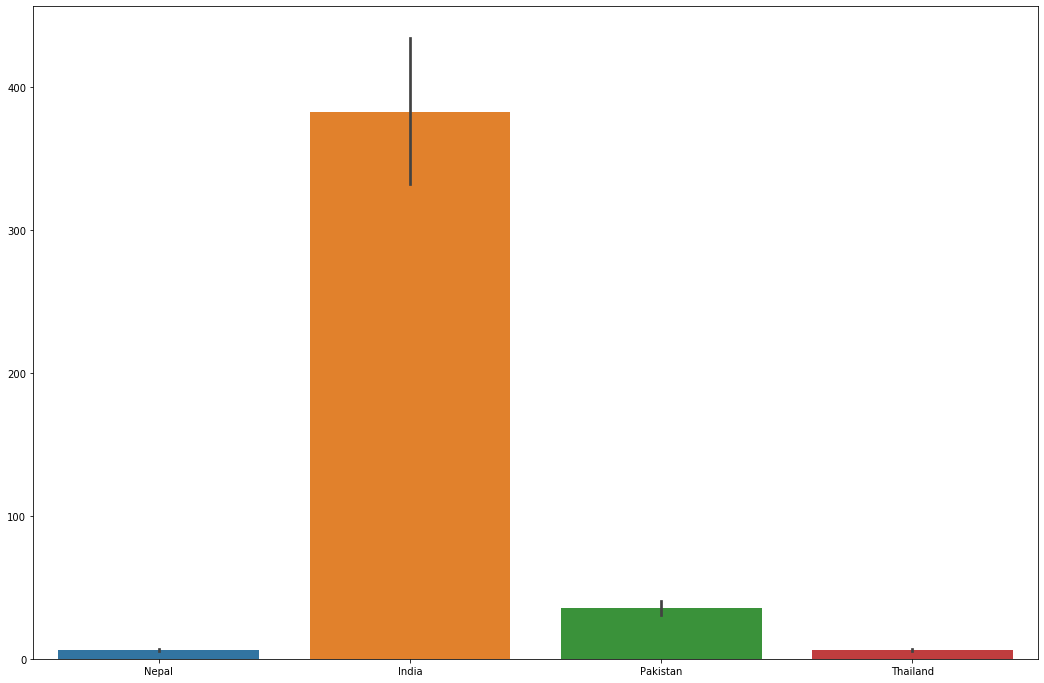

In [108]:

dims = (18,12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(ax=ax, data=df_Asia_new)

In [111]:
Asia_sam = Asia[Asia['location'].isin(['Nepal','India','Pakistan','Thailand'])]

In [112]:
Asia_sam.location.unique()

array(['India', 'Nepal', 'Pakistan', 'Thailand'], dtype=object)

In [113]:
Asia_sam.hospital_beds_per_thousand.unique()

array([0.53, 0.3 , 0.6 , 2.1 ])

In [114]:
Asia_sam.aged_65_older.unique()

array([ 5.989,  5.809,  4.495, 11.373])

In [115]:
Asia_sam.gdp_per_capita.unique()

array([ 6426.674,  2442.804,  5034.708, 16277.671])

In [116]:
Asia_sam.male_smokers.unique()

array([20.6, 37.8, 36.7, 38.8])